In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Garuda"
plt.rcParams["font.size"] = 11

In [2]:
densities = ["30", "10", "6", "2", "1", "0p5", "0p2", "0p1", "0p05"]

data = {}

for density in densities:
    data[density] = np.genfromtxt(f"data/density/{density}.txt")

In [3]:
L = 300
t_f = 3000
bins = 300

time_steps = np.arange(t_f)

# Dictionaries to store histograms and edges
histograms = {}
xedges = {}
yedges = {}

for density in densities:
    data_flattened = data[density].flatten()
    hist, xedge, yedge = np.histogram2d(data_flattened, np.repeat(time_steps, data[density].shape[1]), bins=[bins, t_f], range=[[0, L], [0, t_f]])
    histograms[density] = hist
    xedges[density] = xedge
    yedges[density] = yedge

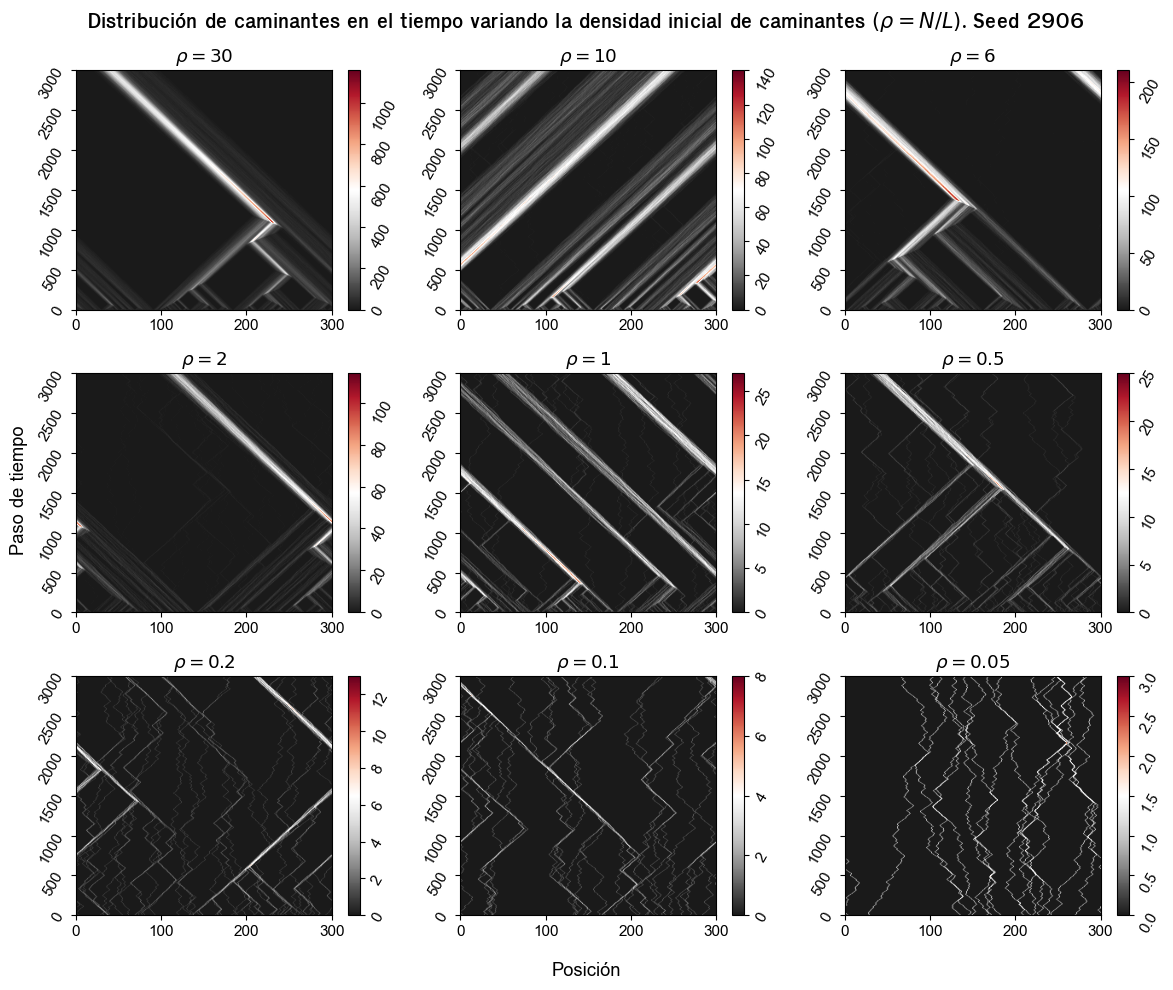

In [4]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(12, 10))
fig.suptitle("Distribución de caminantes en el tiempo variando la densidad inicial de caminantes $(\\rho=N/L)$. Seed 2906", fontweight="bold", fontsize=15)
fig.supxlabel("Posición")
fig.supylabel("Paso de tiempo")

for a in ax.flat:
    a.tick_params(axis='y', which='major', rotation=60)

titles = ["$\\rho=30$", "$\\rho=10$", "$\\rho=6$", "$\\rho=2$", "$\\rho=1$", "$\\rho=0.5$", "$\\rho=0.2$", "$\\rho=0.1$", "$\\rho=0.05$"]

for a, title, density in zip(ax.flat, titles, densities):
    a.set_title(title)
    im = a.imshow(histograms[density].T, origin='lower', aspect='auto', extent=[0, L, 0, t_f], cmap='RdGy_r')
    # im = a.imshow(histogram.T, origin='lower', aspect='auto', extent=[0, L, 0, t_f], cmap='pink')

    cbar = fig.colorbar(im, ax=a)
    cbar.ax.tick_params(rotation=60)

fig.tight_layout()
fig.savefig("figs/density.pdf")